In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [2]:
data = np.load("labels_ann_5k.npy")
data.shape

(5000, 7)

In [3]:
FROGS = np.load("FROG_5k.npy")
FROGS.shape

(5000, 128, 128)

In [4]:
FROGS = FROGS.reshape(5000,-1)

In [5]:
a_max = np.max(FROGS)
b_min = np.min(FROGS)
X_orig = (FROGS - b_min)/(a_max - b_min)
X_train = X_orig[:4600, :]
X_val = X_orig[4600:, :]

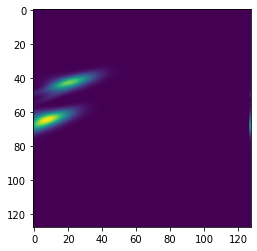

In [6]:
plt.imshow(FROGS[100].reshape(128,128))

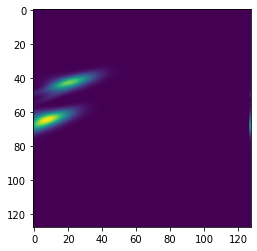

In [7]:
plt.imshow(X_orig[100].reshape(128,128))

In [8]:
#Y = data[:, 0:2]
#y_min = np.min(Y)
#y_max = np.max(Y)
#Y = (Y - y_min)/(y_max - y_min)
#Y.shape

In [9]:
Y = np.zeros([5000,7])
Y[:,0] = (data[:,0] - 295)/(695-295)
Y[:,1] = (data[:,1] - 300)/(1000-300)
Y[:,2] = (data[:,2] - 0.6)/(1.5-0.6)
Y[:,3] = (data[:,3] - 0.6)/(1.5-0.6)
Y[:,4] = (data[:,4] + 0.005)/(0.005 + 0.005)
Y[:,5] = (data[:,5] + 0.0005)/(0.0005 + 0.0005)
Y[:,6] = (data[:,6] + 1000)/(5000+1000)

In [10]:
Y_train = Y[:4600]
Y_val = Y[4600:]

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

def create_model():
    model = Sequential()
    model.add(Dense(512, activation = "sigmoid", input_shape = (16384,)))
    model.add(Dense(128, activation = "sigmoid")) #kernel_regularizer = l2(0.01)
    model.add(Dense(7, activation = "sigmoid"))
    return model

In [21]:
from keras.optimizers import Adam

model = create_model()
opt = Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = "mean_squared_error", metrics = ["accuracy", "mean_absolute_error"])

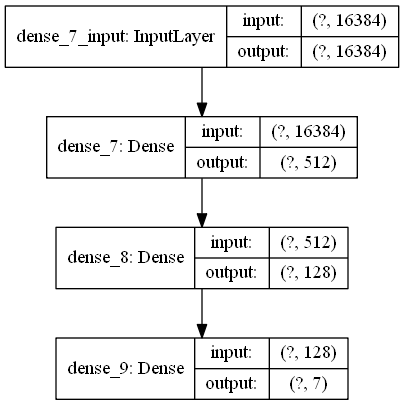

In [22]:
keras.utils.plot_model(model, to_file="ann-v2-orig-plot.png", show_shapes=True)

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 903       
Total params: 8,455,687
Trainable params: 8,455,687
Non-trainable params: 0
_________________________________________________________________


In [24]:
sol = model.fit(X_train, Y_train, epochs = 1000, validation_data=(X_val, Y_val), batch_size = 64)

Train on 4600 samples, validate on 400 samples
Epoch 1/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0867 - accuracy: 0.2309 - mean_absolute_error: 0.2454 - val_loss: 0.0598 - val_accuracy: 0.3650 - val_mean_absolute_error: 0.2010
Epoch 2/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0510 - accuracy: 0.3867 - mean_absolute_error: 0.1779 - val_loss: 0.0456 - val_accuracy: 0.4125 - val_mean_absolute_error: 0.1647
Epoch 3/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0440 - accuracy: 0.4248 - mean_absolute_error: 0.1587 - val_loss: 0.0440 - val_accuracy: 0.4625 - val_mean_absolute_error: 0.1585
Epoch 4/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0417 - accuracy: 0.4487 - mean_absolute_error: 0.1519 - val_loss: 0.0428 - val_accuracy: 0.4650 - val_mean_absolute_error: 0.1547
Epoch 5/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0399 - accuracy: 0.4541 - me

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0162 - accuracy: 0.6885 - mean_absolute_error: 0.0787 - val_loss: 0.0283 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1111
Epoch 40/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0160 - accuracy: 0.6854 - mean_absolute_error: 0.0781 - val_loss: 0.0279 - val_accuracy: 0.6200 - val_mean_absolute_error: 0.1113
Epoch 41/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0159 - accuracy: 0.6867 - mean_absolute_error: 0.0776 - val_loss: 0.0288 - val_accuracy: 0.5925 - val_mean_absolute_error: 0.1125
Epoch 42/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0156 - accuracy: 0.6887 - mean_absolute_error: 0.0769 - val_loss: 0.0286 - val_accuracy: 0.5825 - val_mean_absolute_error: 0.1116
Epoch 43/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0155 - accuracy: 0.6835 - mean_absolute_error: 0.0764 - val_loss: 0.0281 - val_accur

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0130 - accuracy: 0.7424 - mean_absolute_error: 0.0653 - val_loss: 0.0283 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1112
Epoch 78/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0135 - accuracy: 0.7320 - mean_absolute_error: 0.0675 - val_loss: 0.0284 - val_accuracy: 0.5950 - val_mean_absolute_error: 0.1114
Epoch 79/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0132 - accuracy: 0.7291 - mean_absolute_error: 0.0666 - val_loss: 0.0280 - val_accuracy: 0.5950 - val_mean_absolute_error: 0.1100
Epoch 80/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0133 - accuracy: 0.7313 - mean_absolute_error: 0.0671 - val_loss: 0.0279 - val_accuracy: 0.6100 - val_mean_absolute_error: 0.1106
Epoch 81/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0132 - accuracy: 0.7411 - mean_absolute_error: 0.0661 - val_loss: 0.0276 - val_accur

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0124 - accuracy: 0.7437 - mean_absolute_error: 0.0628 - val_loss: 0.0286 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1131loss: 0.0122 - accuracy: 0.7500 - mean_absolu
Epoch 115/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0124 - accuracy: 0.7483 - mean_absolute_error: 0.0634 - val_loss: 0.0280 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1111
Epoch 116/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0121 - accuracy: 0.7520 - mean_absolute_error: 0.0620 - val_loss: 0.0275 - val_accuracy: 0.5725 - val_mean_absolute_error: 0.1101
Epoch 117/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0121 - accuracy: 0.7541 - mean_absolute_error: 0.0613 - val_loss: 0.0285 - val_accuracy: 0.5775 - val_mean_absolute_error: 0.1120
Epoch 118/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0120 - accuracy: 0.7515 - mean_abso

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0115 - accuracy: 0.7637 - mean_absolute_error: 0.0600 - val_loss: 0.0285 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1124
Epoch 153/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0114 - accuracy: 0.7624 - mean_absolute_error: 0.0592 - val_loss: 0.0283 - val_accuracy: 0.5775 - val_mean_absolute_error: 0.1122
Epoch 154/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0115 - accuracy: 0.7626 - mean_absolute_error: 0.0592 - val_loss: 0.0286 - val_accuracy: 0.5975 - val_mean_absolute_error: 0.1135
Epoch 155/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0115 - accuracy: 0.7643 - mean_absolute_error: 0.0594 - val_loss: 0.0290 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1133
Epoch 156/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0114 - accuracy: 0.7691 - mean_absolute_error: 0.0586 - val_loss: 0.0297 - val_a

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0111 - accuracy: 0.7661 - mean_absolute_error: 0.0579 - val_loss: 0.0292 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1139
Epoch 191/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0110 - accuracy: 0.7748 - mean_absolute_error: 0.0568 - val_loss: 0.0292 - val_accuracy: 0.5850 - val_mean_absolute_error: 0.1133
Epoch 192/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0109 - accuracy: 0.7717 - mean_absolute_error: 0.0566 - val_loss: 0.0289 - val_accuracy: 0.5725 - val_mean_absolute_error: 0.1131
Epoch 193/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0109 - accuracy: 0.7683 - mean_absolute_error: 0.0570 - val_loss: 0.0299 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1144
Epoch 194/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0112 - accuracy: 0.7698 - mean_absolute_error: 0.0583 - val_loss: 0.0298 - val_a

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0105 - accuracy: 0.7893 - mean_absolute_error: 0.0550 - val_loss: 0.0301 - val_accuracy: 0.5575 - val_mean_absolute_error: 0.1170
Epoch 229/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0107 - accuracy: 0.7783 - mean_absolute_error: 0.0565 - val_loss: 0.0302 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1171
Epoch 230/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0107 - accuracy: 0.7715 - mean_absolute_error: 0.0566 - val_loss: 0.0294 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1147
Epoch 231/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0104 - accuracy: 0.7878 - mean_absolute_error: 0.0544 - val_loss: 0.0308 - val_accuracy: 0.5650 - val_mean_absolute_error: 0.1168
Epoch 232/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0104 - accuracy: 0.7820 - mean_absolute_error: 0.0543 - val_loss: 0.0298 - val_a

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0103 - accuracy: 0.7809 - mean_absolute_error: 0.0541 - val_loss: 0.0311 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1183
Epoch 267/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0105 - accuracy: 0.7793 - mean_absolute_error: 0.0555 - val_loss: 0.0302 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1168
Epoch 268/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0103 - accuracy: 0.7911 - mean_absolute_error: 0.0545 - val_loss: 0.0299 - val_accuracy: 0.5825 - val_mean_absolute_error: 0.1154
Epoch 269/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0101 - accuracy: 0.7909 - mean_absolute_error: 0.0527 - val_loss: 0.0306 - val_accuracy: 0.5775 - val_mean_absolute_error: 0.1180
Epoch 270/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0102 - accuracy: 0.7924 - mean_absolute_error: 0.0535 - val_loss: 0.0305 - val_a

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0103 - accuracy: 0.7798 - mean_absolute_error: 0.0547 - val_loss: 0.0304 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1171
Epoch 305/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0100 - accuracy: 0.7915 - mean_absolute_error: 0.0533 - val_loss: 0.0310 - val_accuracy: 0.5725 - val_mean_absolute_error: 0.1176
Epoch 306/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0100 - accuracy: 0.8022 - mean_absolute_error: 0.0524 - val_loss: 0.0310 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1179
Epoch 307/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0101 - accuracy: 0.7937 - mean_absolute_error: 0.0534 - val_loss: 0.0314 - val_accuracy: 0.5750 - val_mean_absolute_error: 0.1194
Epoch 308/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0100 - accuracy: 0.7926 - mean_absolute_error: 0.0523 - val_loss: 0.0309 - val_a

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0099 - accuracy: 0.7950 - mean_absolute_error: 0.0527 - val_loss: 0.0321 - val_accuracy: 0.5975 - val_mean_absolute_error: 0.1210
Epoch 343/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0099 - accuracy: 0.7957 - mean_absolute_error: 0.0527 - val_loss: 0.0307 - val_accuracy: 0.5575 - val_mean_absolute_error: 0.1168
Epoch 344/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0098 - accuracy: 0.8002 - mean_absolute_error: 0.0513 - val_loss: 0.0312 - val_accuracy: 0.5650 - val_mean_absolute_error: 0.1191
Epoch 345/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0098 - accuracy: 0.7996 - mean_absolute_error: 0.0519 - val_loss: 0.0310 - val_accuracy: 0.5875 - val_mean_absolute_error: 0.1191
Epoch 346/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0098 - accuracy: 0.8000 - mean_absolute_error: 0.0515 - val_loss: 0.0313 - val_a

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0097 - accuracy: 0.7974 - mean_absolute_error: 0.0517 - val_loss: 0.0319 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1204
Epoch 381/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0096 - accuracy: 0.7917 - mean_absolute_error: 0.0515 - val_loss: 0.0315 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1188
Epoch 382/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0098 - accuracy: 0.7991 - mean_absolute_error: 0.0520 - val_loss: 0.0319 - val_accuracy: 0.5575 - val_mean_absolute_error: 0.1208
Epoch 383/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0097 - accuracy: 0.8017 - mean_absolute_error: 0.0517 - val_loss: 0.0312 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1184
Epoch 384/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0096 - accuracy: 0.8026 - mean_absolute_error: 0.0510 - val_loss: 0.0314 - val_a

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0097 - accuracy: 0.7957 - mean_absolute_error: 0.0514 - val_loss: 0.0312 - val_accuracy: 0.5850 - val_mean_absolute_error: 0.1188
Epoch 419/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0097 - accuracy: 0.8017 - mean_absolute_error: 0.0517 - val_loss: 0.0319 - val_accuracy: 0.5825 - val_mean_absolute_error: 0.1201
Epoch 420/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0096 - accuracy: 0.7976 - mean_absolute_error: 0.0509 - val_loss: 0.0316 - val_accuracy: 0.5950 - val_mean_absolute_error: 0.1191
Epoch 421/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0096 - accuracy: 0.7952 - mean_absolute_error: 0.0511 - val_loss: 0.0329 - val_accuracy: 0.5675 - val_mean_absolute_error: 0.1209
Epoch 422/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0097 - accuracy: 0.7943 - mean_absolute_error: 0.0519 - val_loss: 0.0318 - val_a

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0096 - accuracy: 0.8011 - mean_absolute_error: 0.0513 - val_loss: 0.0316 - val_accuracy: 0.5550 - val_mean_absolute_error: 0.1194
Epoch 457/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0094 - accuracy: 0.8028 - mean_absolute_error: 0.0501 - val_loss: 0.0314 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1198
Epoch 458/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0095 - accuracy: 0.8020 - mean_absolute_error: 0.0508 - val_loss: 0.0320 - val_accuracy: 0.5450 - val_mean_absolute_error: 0.1199
Epoch 459/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0093 - accuracy: 0.8100 - mean_absolute_error: 0.0495 - val_loss: 0.0313 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1191
Epoch 460/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0095 - accuracy: 0.8033 - mean_absolute_error: 0.0508 - val_loss: 0.0323 - val_a

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0094 - accuracy: 0.8102 - mean_absolute_error: 0.0503 - val_loss: 0.0329 - val_accuracy: 0.5775 - val_mean_absolute_error: 0.1220
Epoch 495/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0092 - accuracy: 0.8115 - mean_absolute_error: 0.0490 - val_loss: 0.0326 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1213
Epoch 496/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0092 - accuracy: 0.8124 - mean_absolute_error: 0.0488 - val_loss: 0.0325 - val_accuracy: 0.5425 - val_mean_absolute_error: 0.1215
Epoch 497/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0094 - accuracy: 0.8015 - mean_absolute_error: 0.0502 - val_loss: 0.0330 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1220
Epoch 498/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0092 - accuracy: 0.8035 - mean_absolute_error: 0.0496 - val_loss: 0.0322 - val_a

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0092 - accuracy: 0.8030 - mean_absolute_error: 0.0497 - val_loss: 0.0328 - val_accuracy: 0.5450 - val_mean_absolute_error: 0.1219
Epoch 533/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0092 - accuracy: 0.8043 - mean_absolute_error: 0.0493 - val_loss: 0.0323 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1214
Epoch 534/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0092 - accuracy: 0.8039 - mean_absolute_error: 0.0492 - val_loss: 0.0324 - val_accuracy: 0.5400 - val_mean_absolute_error: 0.1235
Epoch 535/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0094 - accuracy: 0.7952 - mean_absolute_error: 0.0510 - val_loss: 0.0320 - val_accuracy: 0.5550 - val_mean_absolute_error: 0.1220
Epoch 536/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0093 - accuracy: 0.8041 - mean_absolute_error: 0.0502 - val_loss: 0.0334 - val_a

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0090 - accuracy: 0.8150 - mean_absolute_error: 0.0478 - val_loss: 0.0322 - val_accuracy: 0.5675 - val_mean_absolute_error: 0.1209
Epoch 571/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0091 - accuracy: 0.8087 - mean_absolute_error: 0.0490 - val_loss: 0.0323 - val_accuracy: 0.5450 - val_mean_absolute_error: 0.1222ccuracy: 0.
Epoch 572/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0091 - accuracy: 0.7996 - mean_absolute_error: 0.0489 - val_loss: 0.0333 - val_accuracy: 0.5475 - val_mean_absolute_error: 0.1239
Epoch 573/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0092 - accuracy: 0.8143 - mean_absolute_error: 0.0493 - val_loss: 0.0331 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1227
Epoch 574/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0091 - accuracy: 0.8117 - mean_absolute_error: 0.0486 - val_loss: 0.0

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0091 - accuracy: 0.8054 - mean_absolute_error: 0.0490 - val_loss: 0.0331 - val_accuracy: 0.5425 - val_mean_absolute_error: 0.1238
Epoch 609/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0092 - accuracy: 0.8067 - mean_absolute_error: 0.0494 - val_loss: 0.0336 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1237
Epoch 610/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0093 - accuracy: 0.8061 - mean_absolute_error: 0.0502 - val_loss: 0.0336 - val_accuracy: 0.5725 - val_mean_absolute_error: 0.1234
Epoch 611/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0091 - accuracy: 0.8115 - mean_absolute_error: 0.0490 - val_loss: 0.0335 - val_accuracy: 0.5325 - val_mean_absolute_error: 0.1239
Epoch 612/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0090 - accuracy: 0.8146 - mean_absolute_error: 0.0477 - val_loss: 0.0333 - val_a

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0090 - accuracy: 0.8089 - mean_absolute_error: 0.0487 - val_loss: 0.0328 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1213
Epoch 647/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0090 - accuracy: 0.8072 - mean_absolute_error: 0.0481 - val_loss: 0.0333 - val_accuracy: 0.5675 - val_mean_absolute_error: 0.1242
Epoch 648/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0091 - accuracy: 0.8000 - mean_absolute_error: 0.0494 - val_loss: 0.0336 - val_accuracy: 0.5525 - val_mean_absolute_error: 0.1237
Epoch 649/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0090 - accuracy: 0.8100 - mean_absolute_error: 0.0487 - val_loss: 0.0330 - val_accuracy: 0.5825 - val_mean_absolute_error: 0.1217
Epoch 650/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0092 - accuracy: 0.8080 - mean_absolute_error: 0.0495 - val_loss: 0.0342 - val_a

Epoch 684/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0090 - accuracy: 0.8109 - mean_absolute_error: 0.0487 - val_loss: 0.0339 - val_accuracy: 0.5275 - val_mean_absolute_error: 0.1252
Epoch 685/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0090 - accuracy: 0.8159 - mean_absolute_error: 0.0485 - val_loss: 0.0340 - val_accuracy: 0.5925 - val_mean_absolute_error: 0.1253
Epoch 686/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0090 - accuracy: 0.8085 - mean_absolute_error: 0.0485 - val_loss: 0.0331 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1231
Epoch 687/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0090 - accuracy: 0.8124 - mean_absolute_error: 0.0486 - val_loss: 0.0340 - val_accuracy: 0.5475 - val_mean_absolute_error: 0.1247
Epoch 688/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0091 - accuracy: 0.8117 - mean_absolute_error: 0.0497 - val_loss:

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0089 - accuracy: 0.8157 - mean_absolute_error: 0.0481 - val_loss: 0.0333 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1238
Epoch 723/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0088 - accuracy: 0.8176 - mean_absolute_error: 0.0476 - val_loss: 0.0342 - val_accuracy: 0.5650 - val_mean_absolute_error: 0.1257
Epoch 724/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0089 - accuracy: 0.8074 - mean_absolute_error: 0.0491 - val_loss: 0.0339 - val_accuracy: 0.5750 - val_mean_absolute_error: 0.1245
Epoch 725/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0089 - accuracy: 0.8107 - mean_absolute_error: 0.0487 - val_loss: 0.0339 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.12320.8107 - mean_absolute_error: 0.04
Epoch 726/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0090 - accuracy: 0.8037 - mean_absolute_error:

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0092 - accuracy: 0.8117 - mean_absolute_error: 0.0501 - val_loss: 0.0349 - val_accuracy: 0.5475 - val_mean_absolute_error: 0.1263
Epoch 760/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0091 - accuracy: 0.8037 - mean_absolute_error: 0.0500 - val_loss: 0.0348 - val_accuracy: 0.5475 - val_mean_absolute_error: 0.1265bsolute_err
Epoch 761/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0089 - accuracy: 0.8067 - mean_absolute_error: 0.0495 - val_loss: 0.0349 - val_accuracy: 0.5450 - val_mean_absolute_error: 0.1268
Epoch 762/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0089 - accuracy: 0.8124 - mean_absolute_error: 0.0484 - val_loss: 0.0341 - val_accuracy: 0.5475 - val_mean_absolute_error: 0.1253
Epoch 763/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0087 - accuracy: 0.8093 - mean_absolute_error: 0.0477 - val_loss: 0.0

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.8152 - mean_absolute_error: 0.0466 - val_loss: 0.0344 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1249
Epoch 798/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0087 - accuracy: 0.8107 - mean_absolute_error: 0.0478 - val_loss: 0.0347 - val_accuracy: 0.5475 - val_mean_absolute_error: 0.1271
Epoch 799/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0088 - accuracy: 0.8139 - mean_absolute_error: 0.0482 - val_loss: 0.0345 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1257
Epoch 800/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0091 - accuracy: 0.7963 - mean_absolute_error: 0.0501 - val_loss: 0.0342 - val_accuracy: 0.5350 - val_mean_absolute_error: 0.1260
Epoch 801/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0088 - accuracy: 0.8159 - mean_absolute_error: 0.0488 - val_loss: 0.0342 - val_a

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0087 - accuracy: 0.8143 - mean_absolute_error: 0.0475 - val_loss: 0.0348 - val_accuracy: 0.5300 - val_mean_absolute_error: 0.1261ss: 0.0089 - accuracy: 0.8105 - mean_abso
Epoch 836/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0087 - accuracy: 0.8128 - mean_absolute_error: 0.0478 - val_loss: 0.0347 - val_accuracy: 0.5575 - val_mean_absolute_error: 0.1259
Epoch 837/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0087 - accuracy: 0.8143 - mean_absolute_error: 0.0476 - val_loss: 0.0348 - val_accuracy: 0.5650 - val_mean_absolute_error: 0.1263
Epoch 838/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.8252 - mean_absolute_error: 0.0472 - val_loss: 0.0348 - val_accuracy: 0.5350 - val_mean_absolute_error: 0.1256
Epoch 839/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0088 - accuracy: 0.8107 - mean_absolute

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0087 - accuracy: 0.8174 - mean_absolute_error: 0.0477 - val_loss: 0.0350 - val_accuracy: 0.5650 - val_mean_absolute_error: 0.1262
Epoch 873/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.8163 - mean_absolute_error: 0.0471 - val_loss: 0.0352 - val_accuracy: 0.5475 - val_mean_absolute_error: 0.1260
Epoch 874/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0084 - accuracy: 0.8167 - mean_absolute_error: 0.0461 - val_loss: 0.0351 - val_accuracy: 0.5450 - val_mean_absolute_error: 0.1271
Epoch 875/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.8152 - mean_absolute_error: 0.0472 - val_loss: 0.0349 - val_accuracy: 0.5575 - val_mean_absolute_error: 0.1272
Epoch 876/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0087 - accuracy: 0.8154 - mean_absolute_error: 0.0473 - val_loss: 0.0346 - val_a

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.8163 - mean_absolute_error: 0.0475 - val_loss: 0.0352 - val_accuracy: 0.5425 - val_mean_absolute_error: 0.1274
Epoch 911/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.8130 - mean_absolute_error: 0.0473 - val_loss: 0.0353 - val_accuracy: 0.5425 - val_mean_absolute_error: 0.1270
Epoch 912/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0087 - accuracy: 0.8133 - mean_absolute_error: 0.0481 - val_loss: 0.0348 - val_accuracy: 0.5575 - val_mean_absolute_error: 0.1250
Epoch 913/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0087 - accuracy: 0.8089 - mean_absolute_error: 0.0481 - val_loss: 0.0344 - val_accuracy: 0.5450 - val_mean_absolute_error: 0.1260
Epoch 914/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0086 - accuracy: 0.8115 - mean_absolute_error: 0.0474 - val_loss: 0.0352 - val_a

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0085 - accuracy: 0.8176 - mean_absolute_error: 0.0471 - val_loss: 0.0356 - val_accuracy: 0.5475 - val_mean_absolute_error: 0.1278
Epoch 948/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0085 - accuracy: 0.8143 - mean_absolute_error: 0.0467 - val_loss: 0.0352 - val_accuracy: 0.5575 - val_mean_absolute_error: 0.1276
Epoch 949/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.8133 - mean_absolute_error: 0.0475 - val_loss: 0.0357 - val_accuracy: 0.5225 - val_mean_absolute_error: 0.1281n_absolute_err - ETA: 5s -
Epoch 950/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0085 - accuracy: 0.8124 - mean_absolute_error: 0.0473 - val_loss: 0.0349 - val_accuracy: 0.5625 - val_mean_absolute_error: 0.1263
Epoch 951/1000
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0085 - accuracy: 0.8128 - mean_absolute_error: 0.0465 

4600/4600 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.8072 - mean_absolute_error: 0.0473 - val_loss: 0.0350 - val_accuracy: 0.5525 - val_mean_absolute_error: 0.1265
Epoch 986/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0084 - accuracy: 0.8211 - mean_absolute_error: 0.0469 - val_loss: 0.0359 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1278
Epoch 987/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0088 - accuracy: 0.8098 - mean_absolute_error: 0.0491 - val_loss: 0.0354 - val_accuracy: 0.5850 - val_mean_absolute_error: 0.1285
Epoch 988/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0085 - accuracy: 0.8137 - mean_absolute_error: 0.0473 - val_loss: 0.0360 - val_accuracy: 0.5375 - val_mean_absolute_error: 0.1287
Epoch 989/1000
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.8041 - mean_absolute_error: 0.0476 - val_loss: 0.0358 - val_a

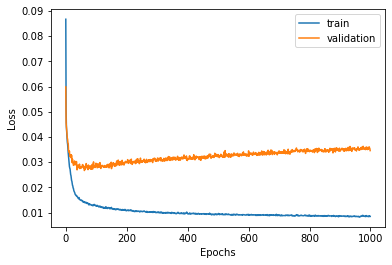

In [25]:
plt.plot(sol.history["loss"])
plt.plot(sol.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
#plt.xlim([20,40])
#plt.ylim([0,0.002])
plt.show()

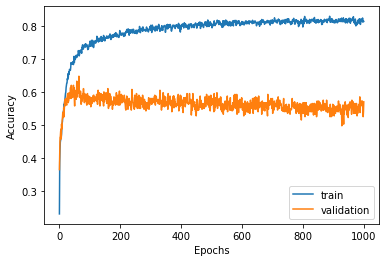

In [26]:
plt.plot(sol.history["accuracy"])
plt.plot(sol.history["val_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
#plt.xlim([20,40])
#plt.ylim([0,0.002])
plt.show()

In [27]:
model.predict(X_val[21].reshape(1,16384))

array([[0.06822705, 0.41353625, 0.29962027, 0.49427414, 0.49534687,
        0.9184939 , 0.9551798 ]], dtype=float32)

In [28]:
Y_val[21]

array([0.2075    , 0.11      , 0.33333333, 0.83333333, 0.55      ,
       0.95      , 0.95833333])

In [29]:
model.save("ann-v2-0.01lr-1000epochs")